# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading dataset

In [2]:
dataset=pd.read_csv("datasets_Iris.csv")

In [3]:
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
col_list=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# checking null values

In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# graph showing count of each categories in target class

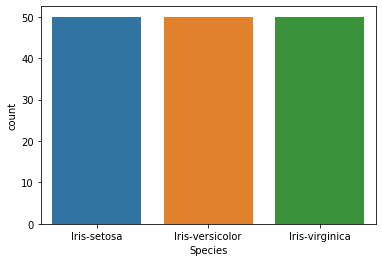

In [7]:
sns.countplot(dataset['Species'])

In [8]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# categorial encoding i.e label_encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Species']=le.fit_transform(dataset['Species'])

# splitting dataset into X and y

In [10]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# graph to show relationship of target class with each attributes

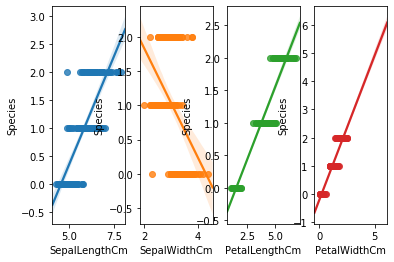

In [12]:
fig,ax=plt.subplots(1,len(col_list))
for i in range(len(col_list)):
    sns.regplot(x=col_list[i],y='Species',data=dataset,ax=ax[i])

# splitting into test and train set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# lets build the model

In [14]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',gamma='auto')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred=svc.predict(X_test)

# accuracy and confusion_matrix for the model built

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)

In [17]:
score

1.0

In [18]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 13]], dtype=int64)